# Projeto

Objetivo: Armazenar gastos (até o momento) por deputado federal

1. Obter Dados
2. Efetuar os ajustes necessários
3. Armazenar no sqllite

In [1]:
import pandas as pd
import requests 

In [2]:
# lendo dados da API
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [3]:
resultado.json()

{'dados': [{'id': 204554,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
   'nome': 'Abílio Santana',
   'siglaPartido': 'PL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
   'siglaUf': 'BA',
   'idLegislatura': 56,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg',
   'email': 'dep.abiliosantana@camara.leg.br'},
  {'id': 204521,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204521',
   'nome': 'Abou Anni',
   'siglaPartido': 'PSL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36837',
   'siglaUf': 'SP',
   'idLegislatura': 56,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204521.jpg',
   'email': 'dep.abouanni@camara.leg.br'},
  {'id': 204379,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
   'nome': 'Acácio Favacho',
   'siglaPartido': 'PROS',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/3676

In [4]:
# transportado dados obtidos para um DataFrame (tag dados)
deputados = pd.DataFrame(resultado.json()['dados'])

In [5]:
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [6]:
# qtd de deputados
deputados.shape

(513, 9)

In [7]:
# varrendo os IDs do DataFrame anterior e pesquisando os gastos na API de gastos
gastos = [] #lista
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/deputados/"+str(id)+"/despesas?ordem=ASC&ano=2020"
    resposta = requests.get(url_despesa)
    # jogando resultado em um DataFrame a partir da tag dados
    gasto = pd.DataFrame(resposta.json()['dados'])
    # Adiciona ID no DataFrame
    gasto['id'] = id
    gastos.append(gasto)
    

In [8]:
len(gastos)

513

In [9]:
len(gastos[0])

15

In [10]:
# Gastos do 1º DataFrame (1º deputado)
gastos[0]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2020,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7004672,Nota Fiscal,0,2020-01-15,417815556,132.76,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,118.35,14.41,,1671810,0,204554
1,2020,2,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023227,Nota Fiscal,0,2020-02-12,423977595,162.27,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,159.97,2.30,,1680936,0,204554
2,2020,3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049816,Nota Fiscal,0,2020-03-13,430442113,284.36,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,281.03,3.33,,1693675,0,204554
3,2020,4,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049817,Nota Fiscal,0,2020-04-13,437017526,80.96,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,80.96,0.00,,1693676,0,204554
4,2020,5,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7060152,Nota Fiscal,0,2020-05-13,443686627,65.32,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,45.86,19.46,,1699542,0,204554
5,2020,6,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7071762,Nota Fiscal,0,2020-06-10,4500093911,47.13,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,45.15,1.98,,1705745,0,204554
6,2020,7,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7076692,Nota Fiscal,0,2020-07-13,456606790,55.06,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,54.08,0.98,,1708198,0,204554
7,2020,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7086351,Nota Fiscal,0,2020-08-12,463058968,59.24,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,57.89,1.35,,1713101,0,204554
8,2020,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7101142,Nota Fiscal,0,2020-09-11,469705596,75.90,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,74.58,1.32,,1720324,0,204554
9,2020,10,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7118482,Nota Fiscal,0,2020-10-13,476186306,61.38,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,54.00,7.38,,1728100,0,204554


# Transformação

In [11]:
#concatenando DataFrames
total = pd.concat(gastos)

In [12]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2020.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7004672.0,Nota Fiscal,0.0,2020-01-15,417815556,132.76,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,118.35,14.41,,1671810.0,0.0,204554
1,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023227.0,Nota Fiscal,0.0,2020-02-12,423977595,162.27,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,159.97,2.30,,1680936.0,0.0,204554
2,2020.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049816.0,Nota Fiscal,0.0,2020-03-13,430442113,284.36,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,281.03,3.33,,1693675.0,0.0,204554
3,2020.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049817.0,Nota Fiscal,0.0,2020-04-13,437017526,80.96,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,80.96,0.00,,1693676.0,0.0,204554
4,2020.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7060152.0,Nota Fiscal,0.0,2020-05-13,443686627,65.32,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,45.86,19.46,,1699542.0,0.0,204554


In [13]:
#olhando 3 IDs aleatórios
total.sample(3)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
2,2020.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7014418.0,Nota Fiscal,0.0,2020-01-28,108380501,104.26,https://www.camara.leg.br/cota-parlamentar/doc...,CEEE - Companhia Estadual de Distribuição de E...,08467115000100,104.26,0.00,,1676064.0,0.0,73486
13,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023864.0,Nota Fiscal Eletrônica,4.0,2020-02-29,120264,175.77,http://camara.leg.br/cota-parlamentar/nota-fis...,S.A. ATACADISTA DE ALIMENTOS LTDA,07738069000166,175.77,0.00,,1681194.0,0.0,204500
1,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7048312.0,Nota Fiscal,0.0,2020-02-12,424200768,686.13,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,658.80,27.33,,1692881.0,0.0,150418


In [14]:
# Existe valores ausentes?
total.isnull().sum()

ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento         51
numDocumento           0
valorDocumento         0
urlDocumento         163
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
id                     0
dtype: int64

In [15]:
#deletar data do documento e url do documento
del total['dataDocumento']
del total['urlDocumento']

In [16]:
total.head(5)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2020.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7004672.0,Nota Fiscal,0.0,417815556,132.76,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,118.35,14.41,,1671810.0,0.0,204554
1,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023227.0,Nota Fiscal,0.0,423977595,162.27,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,159.97,2.30,,1680936.0,0.0,204554
2,2020.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049816.0,Nota Fiscal,0.0,430442113,284.36,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,281.03,3.33,,1693675.0,0.0,204554
3,2020.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049817.0,Nota Fiscal,0.0,437017526,80.96,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,80.96,0.00,,1693676.0,0.0,204554
4,2020.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7060152.0,Nota Fiscal,0.0,443686627,65.32,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,45.86,19.46,,1699542.0,0.0,204554


In [17]:
# verificando campo numRessarcimento (em branco)
total.numRessarcimento.value_counts()

     7365
0      94
Name: numRessarcimento, dtype: int64

In [18]:
total.shape

(7459, 16)

In [19]:
del total['numRessarcimento']

In [20]:
total.head(5)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2020.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7004672.0,Nota Fiscal,0.0,417815556,132.76,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,118.35,14.41,1671810.0,0.0,204554
1,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023227.0,Nota Fiscal,0.0,423977595,162.27,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,159.97,2.30,1680936.0,0.0,204554
2,2020.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049816.0,Nota Fiscal,0.0,430442113,284.36,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,281.03,3.33,1693675.0,0.0,204554
3,2020.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049817.0,Nota Fiscal,0.0,437017526,80.96,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,80.96,0.00,1693676.0,0.0,204554
4,2020.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7060152.0,Nota Fiscal,0.0,443686627,65.32,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,45.86,19.46,1699542.0,0.0,204554


In [21]:
# Excluindo valores duplicados (Se houver)
print(total.shape)
total.drop_duplicates()
print(total.shape)

(7459, 15)
(7459, 15)


In [22]:
# verificando se os valores númericos foram corretamente entendidos pelo pandas
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 14
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                7459 non-null   float64
 1   mes                7459 non-null   float64
 2   tipoDespesa        7459 non-null   object 
 3   codDocumento       7459 non-null   float64
 4   tipoDocumento      7459 non-null   object 
 5   codTipoDocumento   7459 non-null   float64
 6   numDocumento       7459 non-null   object 
 7   valorDocumento     7459 non-null   float64
 8   nomeFornecedor     7459 non-null   object 
 9   cnpjCpfFornecedor  7459 non-null   object 
 10  valorLiquido       7459 non-null   float64
 11  valorGlosa         7459 non-null   float64
 12  codLote            7459 non-null   float64
 13  parcela            7459 non-null   float64
 14  id                 7459 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 932.4+ KB


In [23]:
#verificando padrões dos dados obtidos
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,7459.0,7459.000000,7.459000e+03,7459.000000,7459.000000,7459.000000,7459.000000,7.459000e+03,7459.000000,7459.000000
mean,2020.0,5.953613,6.981991e+06,1.050275,1630.060999,1620.865391,8.903905,1.682889e+06,0.000402,167439.325379
std,0.0,3.563543,7.825248e+05,1.515901,3642.618468,3636.690289,144.279573,1.911916e+05,0.020052,45810.182869
min,2020.0,1.000000,0.000000e+00,0.000000,0.150000,0.150000,0.000000,0.000000e+00,0.000000,62881.000000
25%,2020.0,3.000000,7.039172e+06,0.000000,159.000000,157.405000,0.000000,1.687578e+06,0.000000,143632.000000
50%,2020.0,6.000000,7.066150e+06,0.000000,350.000000,348.970000,0.000000,1.702786e+06,0.000000,178961.000000
75%,2020.0,9.000000,7.102550e+06,1.000000,1634.000000,1625.000000,0.000000,1.721162e+06,0.000000,204453.000000
max,2020.0,12.000000,7.165779e+06,4.000000,70000.000000,70000.000000,6129.010000,1.751506e+06,1.000000,213762.000000


In [24]:
# observa-se no quadro acima que o maior gasto foi de 70000 reais.

In [25]:
# Analisando padrões no nome do fornecedor
total.nomeFornecedor.value_counts().head(20)

AMORETTO CAFES EXPRESSO LTDA                                     298
CEMIG DISTRIBUIÇÃO S.A.                                          267
COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA                     198
CLARO S.A.                                                       175
CEEE - Companhia Estadual de Distribuição de Energia Elétrica    148
CONDE & DELL ARINGA - DES DE SOFTWARES                           119
Claro S.A                                                        115
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                           109
Copel Distribuição S.A.                                          102
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                      78
CELESC DISTRIBUICAO S.A                                           75
Eletropaulo Metropolitana Eletricidade de São Paulo S.A. ENEL     74
Companhia Energética de Pernambuco                                57
AGUAS GUARIROBA                                                   56
Claro S.A - NET                   

In [26]:
#corrigindo o padrão SA no nome dos fornecedores para S.A e deixando o conteúdo em maiúsculo
[str(fornecedor).upper().replace("S.A.", "S.A").replace("S/A", "S.A") for fornecedor in total.nomeFornecedor]

['COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
 'IOX COMERCIO LTDA EPP',
 'MATHEUS QUADROS LOIOLA MARTINS',
 'MATHEUS QUADROS LOIOLA MARTINS',
 'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A ENEL',
 'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A ENEL',
 'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A ENEL',
 'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A ENEL',
 'ENEL',
 'ENEL',
 'ENEL',
 'ENEL - ELETROPAULO',
 'ENEL

In [27]:
# Armazenar ajuste no DataFrame
total.nomeFornecedor = [str(fornecedor).upper().replace("S.A.", "S.A").replace("S/A", "S.A") for fornecedor in total.nomeFornecedor]

In [28]:
# Analisando padrões no nome do fornecedor novamente
total.nomeFornecedor.value_counts().head(20)

CLARO S.A                                                        340
AMORETTO CAFES EXPRESSO LTDA                                     298
CEMIG DISTRIBUIÇÃO S.A                                           267
COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA                     198
CEEE - COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ELÉTRICA    148
CONDE & DELL ARINGA - DES DE SOFTWARES                           119
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                           109
COPEL DISTRIBUIÇÃO S.A                                           103
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                      78
CELESC DISTRIBUICAO S.A                                           75
ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A ENEL      74
COMPANHIA ENERGÉTICA DE PERNAMBUCO                                57
ADOBE SYSTEMS SOFTWARE                                            56
AGUAS GUARIROBA                                                   56
CLARO S.A - NET                   

### Carga dos dados

In [30]:
from sqlalchemy import create_engine

In [31]:
#criando conexão com o DB
engine = create_engine('sqlite:///dados_abertos.db')

In [32]:
# criando tabela a partir do DataFrame de deputados
deputados.to_sql('deputados', engine)

In [33]:
# criando tabela a partir do DataFrame de despesas por deputado
total.to_sql('despesas_total', engine)

## Análise

In [34]:
total = pd.read_sql('select * from despesas_total;', engine)
total.head()

,index,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,0,2020.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7004672.0,Nota Fiscal,0.0,417815556,132.76,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,118.35,14.41,1671810.0,0.0,204554
1,1,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023227.0,Nota Fiscal,0.0,423977595,162.27,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,159.97,2.30,1680936.0,0.0,204554
2,2,2020.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049816.0,Nota Fiscal,0.0,430442113,284.36,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,281.03,3.33,1693675.0,0.0,204554
3,3,2020.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049817.0,Nota Fiscal,0.0,437017526,80.96,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,80.96,0.00,1693676.0,0.0,204554
4,4,2020.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7060152.0,Nota Fiscal,0.0,443686627,65.32,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,15139629000194,45.86,19.46,1699542.0,0.0,204554


In [35]:
deputados = pd.read_sql('select * from deputados;', engine)
deputados.head()

,index,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [36]:
## unindo as duas consultas
total = total.merge(deputados, on=['id'])
total.head()

,index_x,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,...,id,index_y,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,2020.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7004672.0,Nota Fiscal,0.0,417815556,132.76,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,...,204554,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,1,2020.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7023227.0,Nota Fiscal,0.0,423977595,162.27,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,...,204554,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
2,2,2020.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049816.0,Nota Fiscal,0.0,430442113,284.36,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,...,204554,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
3,3,2020.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7049817.0,Nota Fiscal,0.0,437017526,80.96,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,...,204554,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
4,4,2020.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7060152.0,Nota Fiscal,0.0,443686627,65.32,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,...,204554,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br


In [40]:
# agrupando o valordocumento e valorliquido por depudado
gastos_deputados = total.groupby(['nome','siglaPartido']).sum()[['valorDocumento', 'valorLiquido']]
gastos_deputados

,,valorDocumento,valorLiquido
nome,siglaPartido,,
AJ Albuquerque,PP,5779.52,5779.52
Abou Anni,PSL,19123.83,18942.95
Abílio Santana,PL,4299.36,4244.29
Acácio Favacho,PROS,5836.06,5836.06
Adolfo Viana,PSDB,3865.03,3865.03
...,...,...,...
Zé Silva,SOLIDARIEDADE,5365.54,5324.70
Zé Vitor,PL,2404.47,2404.47
Átila Lins,PP,3536.72,3536.72


In [41]:
# ordenando informações
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)
gastos_deputados

,,valorDocumento,valorLiquido
nome,siglaPartido,,
Vicentinho Júnior,PL,365000.00,365000.00
Gustinho Ribeiro,SOLIDARIEDADE,337200.00,337200.00
Aline Gurgel,REPUBLICANOS,327946.54,327932.64
Carlos Bezerra,MDB,283000.00,283000.00
Jhonatan de Jesus,REPUBLICANOS,233102.90,233102.90
...,...,...,...
Marcelo Álvaro Antônio,PSL,724.01,724.01
Paulo Ganime,NOVO,717.14,717.14
Miguel Lombardi,PL,680.23,670.38


In [42]:
#Top 10
gastos_deputados.head(10)

,,valorDocumento,valorLiquido
nome,siglaPartido,,
Vicentinho Júnior,PL,365000.00,365000.00
Gustinho Ribeiro,SOLIDARIEDADE,337200.00,337200.00
Aline Gurgel,REPUBLICANOS,327946.54,327932.64
Carlos Bezerra,MDB,283000.00,283000.00
Jhonatan de Jesus,REPUBLICANOS,233102.90,233102.90
Nivaldo Albuquerque,PTB,200784.52,199251.75
Silas Câmara,REPUBLICANOS,185006.39,185006.39
Domingos Neto,PSD,180000.00,173870.99
Vinicius Gurgel,PL,165446.51,165446.51


In [43]:
# Top -10
gastos_deputados.tail(10)

,,valorDocumento,valorLiquido
nome,siglaPartido,,
Paulo Eduardo Martins,PSC,1235.15,1235.15
Zé Carlos,PT,1218.05,1208.98
Jaqueline Cassol,PP,1184.72,1184.72
Caroline de Toni,PSL,1012.21,1011.54
Tabata Amaral,PDT,994.95,991.28
Marcelo Álvaro Antônio,PSL,724.01,724.01
Paulo Ganime,NOVO,717.14,717.14
Miguel Lombardi,PL,680.23,670.38
Eduardo Bolsonaro,PSL,582.61,582.61


In [44]:
# preparando dados para o gráfico (top 10 por fornecedor)
total.nomeFornecedor.value_counts()[:10]

CLARO S.A                                                        340
AMORETTO CAFES EXPRESSO LTDA                                     298
CEMIG DISTRIBUIÇÃO S.A                                           267
COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA                     198
CEEE - COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ELÉTRICA    148
CONDE & DELL ARINGA - DES DE SOFTWARES                           119
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                           109
COPEL DISTRIBUIÇÃO S.A                                           103
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                      78
CELESC DISTRIBUICAO S.A                                           75
Name: nomeFornecedor, dtype: int64

In [45]:
%matplotlib inline

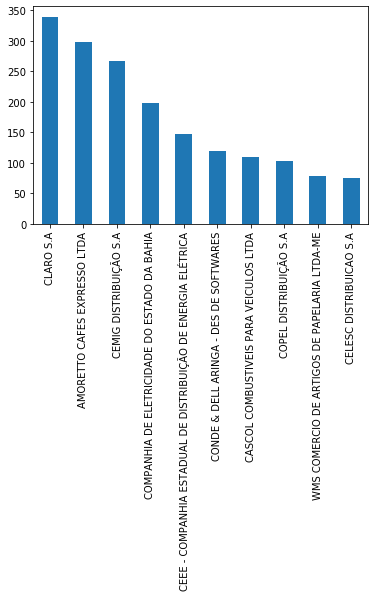

In [50]:
total.nomeFornecedor.value_counts()[:10].plot(kind="bar")